In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-hiring-decisions-in-recruitment-data/recruitment_data.csv


In [2]:
import warnings

# Suppress specific deprecation and future warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('/kaggle/input/predicting-hiring-decisions-in-recruitment-data/recruitment_data.csv')

# **Exploring the Dataframe**

In [4]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [5]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)
    
    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()
    
    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")
        
    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())
    
    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n", df.describe().transpose())

# Call the function
get_df_info(df)


Shape of DataFrame:  (1500, 11)

Columns in DataFrame:  ['Age', 'Gender', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'RecruitmentStrategy', 'HiringDecision']

Data types of columns:
 Age                      int64
Gender                   int64
EducationLevel           int64
ExperienceYears          int64
PreviousCompanies        int64
DistanceFromCompany    float64
InterviewScore           int64
SkillScore               int64
PersonalityScore         int64
RecruitmentStrategy      int64
HiringDecision           int64
dtype: object

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non

> **Correalation Matrix**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

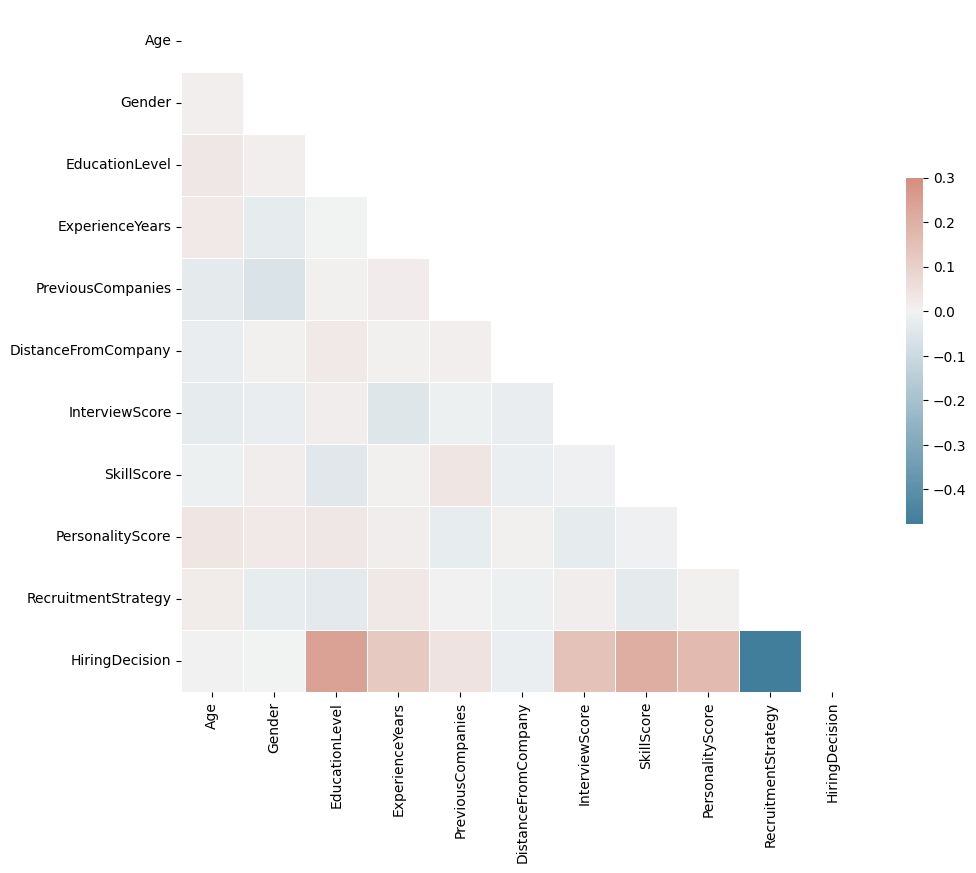

In [7]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

> **Let’s proceed with creating the plot based on the ‘HiringDecision’ column. We’ll calculate the percentage of hired candidates for each recruitment strategy**

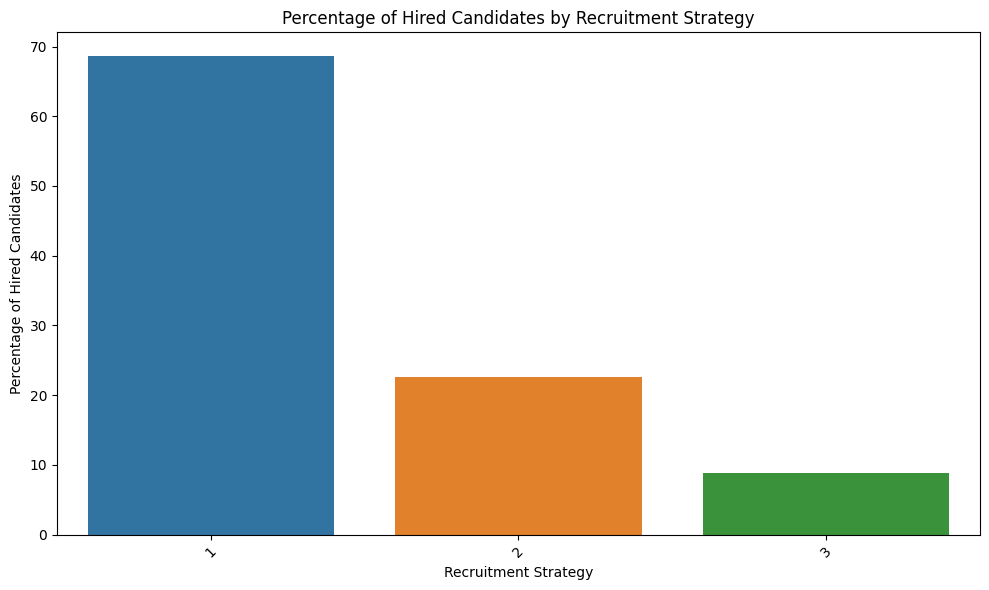

In [8]:
# Filter data to include only hired candidates (HiringDecision == 1)
hired_df = df[df['HiringDecision'] == 1]

# Calculate the percentage of hired candidates by recruitment strategy
strategy_percentages = hired_df.groupby('RecruitmentStrategy')['HiringDecision'].count() / len(hired_df) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=strategy_percentages.index, y=strategy_percentages.values)
plt.xlabel('Recruitment Strategy')
plt.ylabel('Percentage of Hired Candidates')
plt.title('Percentage of Hired Candidates by Recruitment Strategy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**The plot above shows that Recruitment Strategy 1 has been effective and has given more positive response.**

**Distribution of Age of the Selected Candidates**

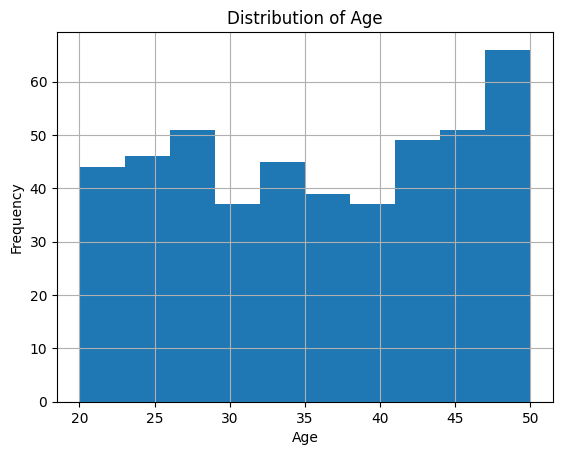

In [9]:
# Draw a histogram of the age column
hired_df['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


> **Distribution of Genders of the Hired Candidates**

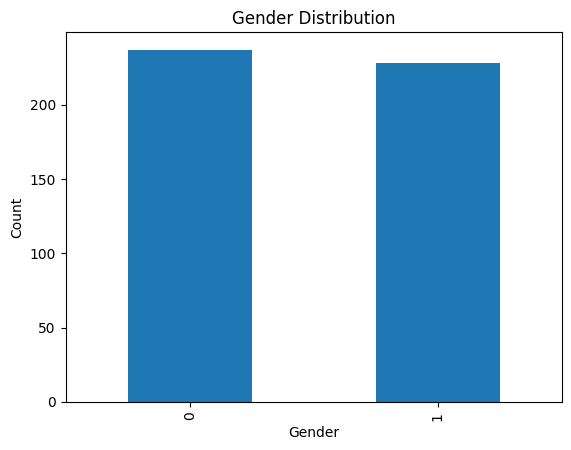

In [10]:
hired_df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

**Education Level of Hired Candidates**

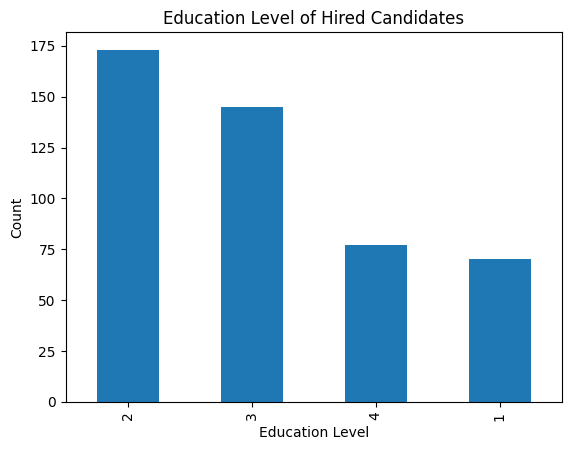

In [11]:
hired_df['EducationLevel'].value_counts().plot(kind='bar')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level of Hired Candidates')
plt.show()

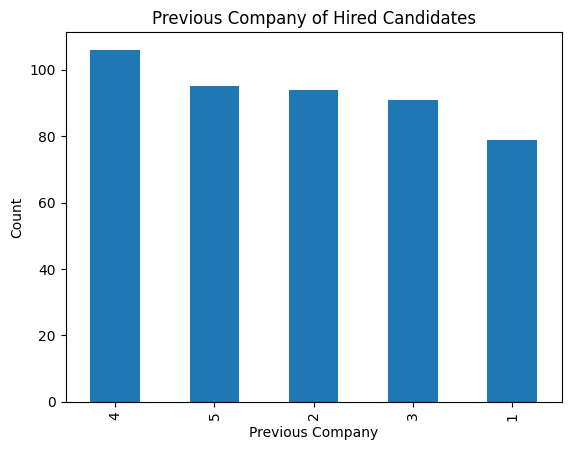

In [12]:
hired_df['PreviousCompanies'].value_counts().plot(kind='bar')
plt.xlabel('Previous Company')
plt.ylabel('Count')
plt.title('Previous Company of Hired Candidates')
plt.show()

**Density plot of Interview, Skill and Personlaity Scores**

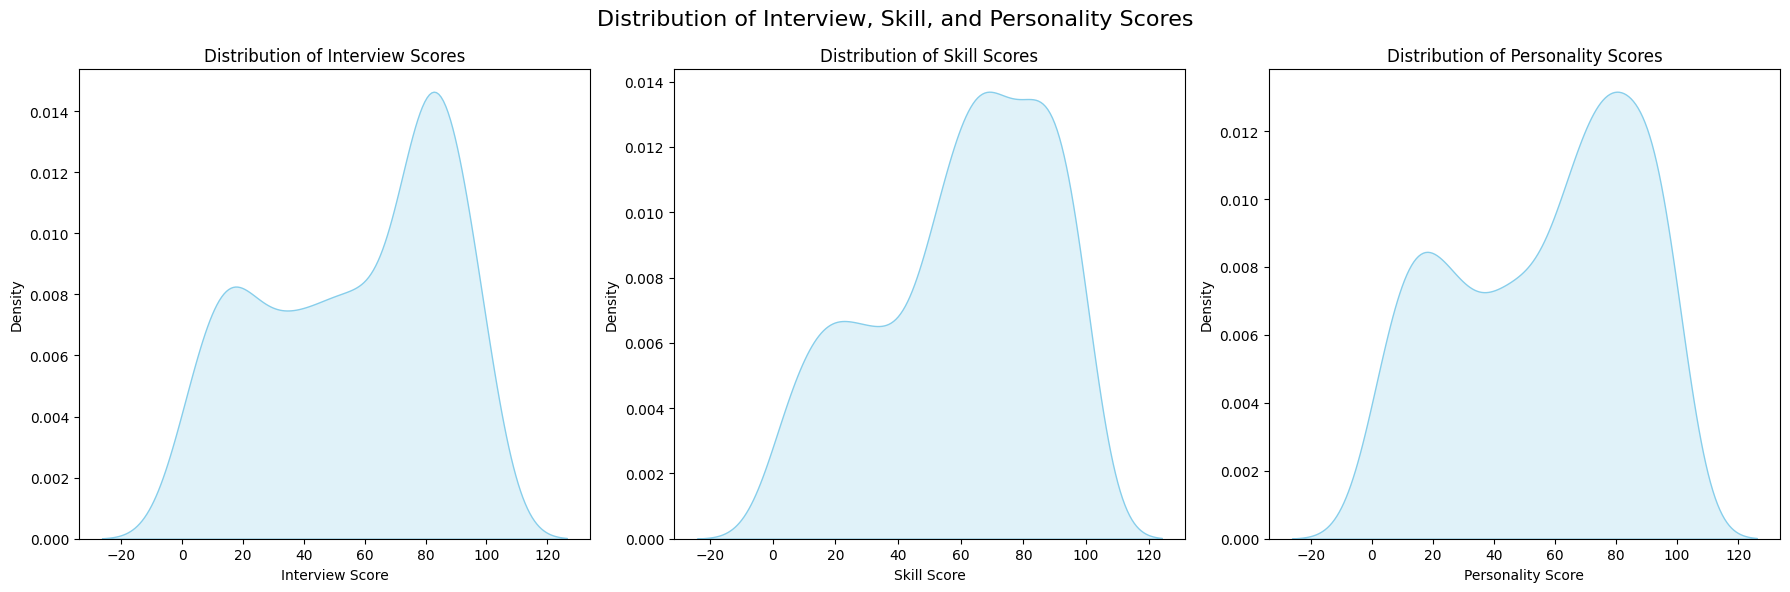

In [13]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot interview scores
sns.kdeplot(hired_df['InterviewScore'], fill=True, color='skyblue', label='Interview Score', ax=axes[0])
axes[0].set_xlabel('Interview Score')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of Interview Scores')

# Plot skill scores
sns.kdeplot(hired_df['SkillScore'], fill=True, color='skyblue', label='Skill Score', ax=axes[1])
axes[1].set_xlabel('Skill Score')
axes[1].set_ylabel('Density')
axes[1].set_title('Distribution of Skill Scores')

# Plot personality scores
sns.kdeplot(hired_df['PersonalityScore'], fill=True, color='skyblue', label='Personality Score', ax=axes[2])
axes[2].set_xlabel('Personality Score')
axes[2].set_ylabel('Density')
axes[2].set_title('Distribution of Personality Scores')

# Add overall title
plt.suptitle('Distribution of Interview, Skill, and Personality Scores', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


# **Predictive Modelling**

In [14]:
# Define the features and the target
X = df.drop('HiringDecision', axis=1)
y = df['HiringDecision']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

# **Applying 10 Machine Learning Models**

In [16]:
def apply_models(X, y):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Check for class imbalance
    class_counts = np.bincount(y_train)
    min_samples = np.min(class_counts)
    max_samples = np.max(class_counts)
    imbalance_ratio = min_samples / max_samples
    
    if imbalance_ratio < 0.5:  # Adjusted threshold
        print(f"Class imbalance detected. Imbalance ratio: {imbalance_ratio:.2f}")
        if imbalance_ratio < 0.1:
            print("Severe imbalance. Applying SMOTE...")
            smote = SMOTE(random_state=42)
            X_train, y_train = smote.fit_resample(X_train, y_train)
        else:
            print("Moderate imbalance. Consider adjusting class weights in models.")
    
    # Apply SMOTE (class imbalance)
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and test data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the models
    models = {
        'LogisticRegression': LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs', class_weight='balanced'),
        'SVC': SVC(C=1.0, kernel='rbf', probability=True, class_weight='balanced'),
        'DecisionTree': DecisionTreeClassifier(max_depth=5, min_samples_split=2, class_weight='balanced'),
        'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced'),
        'ExtraTrees': ExtraTreesClassifier(n_estimators=100, max_depth=10, class_weight='balanced'),
        'AdaBoost': AdaBoostClassifier(n_estimators=50, learning_rate=0.1),
        'GradientBoost': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100),
        'LightGBM': LGBMClassifier(n_estimators=100, boosting_type='gbdt'),
        'CatBoost': CatBoostClassifier(verbose=0, iterations=100)
    }

    # Initialize a dictionary to hold the performance of each model
    model_performance = {}

    # Apply each model
    for model_name, model in models.items():
        print(f"\n\033[1mClassification with {model_name}:\033[0m\n{'-' * 30}")
        
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Calculate the accuracy and ROC AUC score
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        # Store the performance in the dictionary
        model_performance[model_name] = (accuracy, roc_auc)

        # Print the accuracy score
        print("\033[1m**Accuracy**:\033[0m\n", accuracy)

        # Print the ROC AUC score
        print("\033[1m**ROC AUC Score**:\033[0m\n", roc_auc)

        # Print the confusion matrix
        print("\n\033[1m**Confusion Matrix**:\033[0m\n", confusion_matrix(y_test, y_pred))

        # Print the classification report
        print("\n\033[1m**Classification Report**:\033[0m\n", classification_report(y_test, y_pred))

    # Sort the models based on ROC AUC score and pick the top 3
    top_3_models = sorted(model_performance.items(), key=lambda x: x[1][1], reverse=True)[:3]
    print("\n\033[1mTop 3 Models based on ROC AUC Score:\033[0m\n", top_3_models)

    # Extract the model names and classifiers for the top 3 models
    top_3_model_names = [model[0] for model in top_3_models]
    top_3_classifiers = [models[model_name] for model_name in top_3_model_names]

    # Create a Voting Classifier with the top 3 models
    print("\n\033[1mInitializing Voting Classifier with top 3 models...\033[0m\n")
    voting_clf = VotingClassifier(estimators=list(zip(top_3_model_names, top_3_classifiers)), voting='soft')
    voting_clf.fit(X_train, y_train)
    y_pred = voting_clf.predict(X_test)
    y_pred_proba = voting_clf.predict_proba(X_test)[:, 1]
    print("\n\033[1m**Voting Classifier Evaluation**:\033[0m\n")
    print("\033[1m**Accuracy**:\033[0m\n", accuracy_score(y_test, y_pred))
    print("\033[1m**ROC AUC Score**:\033[0m\n", roc_auc_score(y_test, y_pred_proba))
    print("\n\033[1m**Confusion Matrix**:\033[0m\n", confusion_matrix(y_test, y_pred))
    print("\n\033[1m**Classification Report**:\033[0m\n", classification_report(y_test, y_pred))

    # Create a Stacking Classifier with the top 3 models
    print("\n\033[1mInitializing Stacking Classifier with top 3 models...\033[0m\n")
    stacking_clf = StackingClassifier(estimators=list(zip(top_3_model_names, top_3_classifiers)))
    stacking_clf.fit(X_train, y_train)
    y_pred = stacking_clf.predict(X_test)
    y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]
    print("\n\033[1m**Stacking Classifier Evaluation**:\033[0m\n")
    print("\033[1m**Accuracy**:\033[0m\n", accuracy_score(y_test, y_pred))
    print("\033[1m**ROC AUC Score**:\033[0m\n", roc_auc_score(y_test, y_pred_proba))
    print("\n\033[1m**Confusion Matrix**:\033[0m\n", confusion_matrix(y_test, y_pred))
    print("\n\033[1m**Classification Report**:\033[0m\n", classification_report(y_test, y_pred))

    

In [17]:
# Apply the function on X and y
apply_models(X, y)

Class imbalance detected. Imbalance ratio: 0.46
Moderate imbalance. Consider adjusting class weights in models.

Classification with LogisticRegression:
------------------------------
**Accuracy**:
 0.8366666666666667
**ROC AUC Score**:
 0.9103693570451435

**Confusion Matrix**:
 [[176  39]
 [ 10  75]]

**Classification Report**:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88       215
           1       0.66      0.88      0.75        85

    accuracy                           0.84       300
   macro avg       0.80      0.85      0.82       300
weighted avg       0.86      0.84      0.84       300


Classification with SVC:
------------------------------
**Accuracy**:
 0.8733333333333333
**ROC AUC Score**:
 0.9207387140902874

**Confusion Matrix**:
 [[190  25]
 [ 13  72]]

**Classification Report**:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       215
           1       0.74  

# **Model Building**

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


> **XGB Classifier**

In [19]:
# XGBoost Classifier
xgb_classifier = XGBClassifier(
    objective='binary:logistic',  # Binary classification objective
    max_depth=3,                  # Maximum depth of trees
    learning_rate=0.1,            # Learning rate (step size)
    n_estimators=100,             # Number of boosting round
)

In [20]:
# Model Training
xgb_classifier.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
# Predictions
y_pred = xgb_classifier.predict(X_test_scaled)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       215
           1       0.93      0.89      0.91        85

    accuracy                           0.95       300
   macro avg       0.94      0.93      0.94       300
weighted avg       0.95      0.95      0.95       300

AUC-ROC Score: 0.9331
Confusion Matrix:
[[209   6]
 [  9  76]]


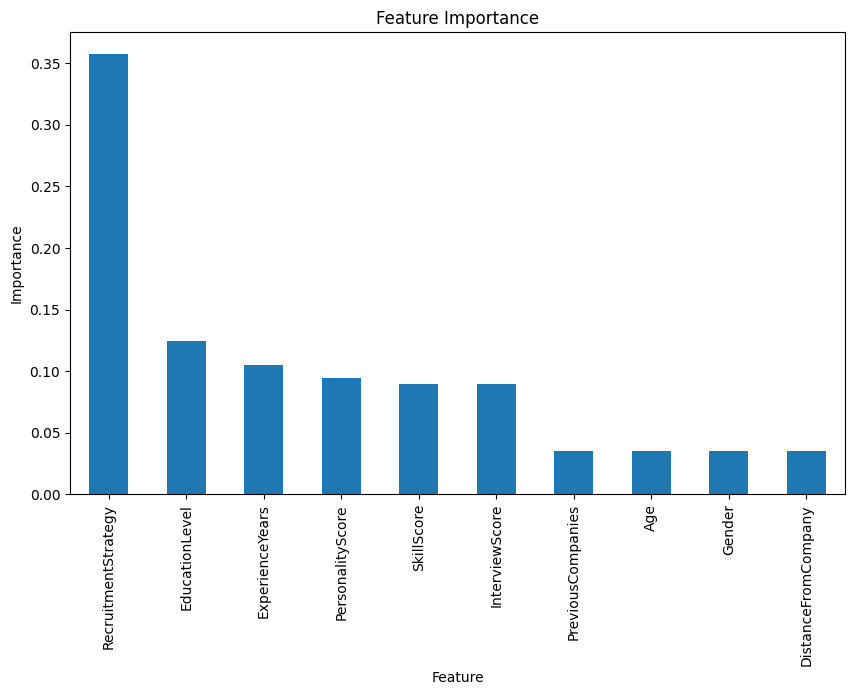

In [22]:
# Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Score: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Feature Importance
feature_importance = pd.Series(xgb_classifier.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

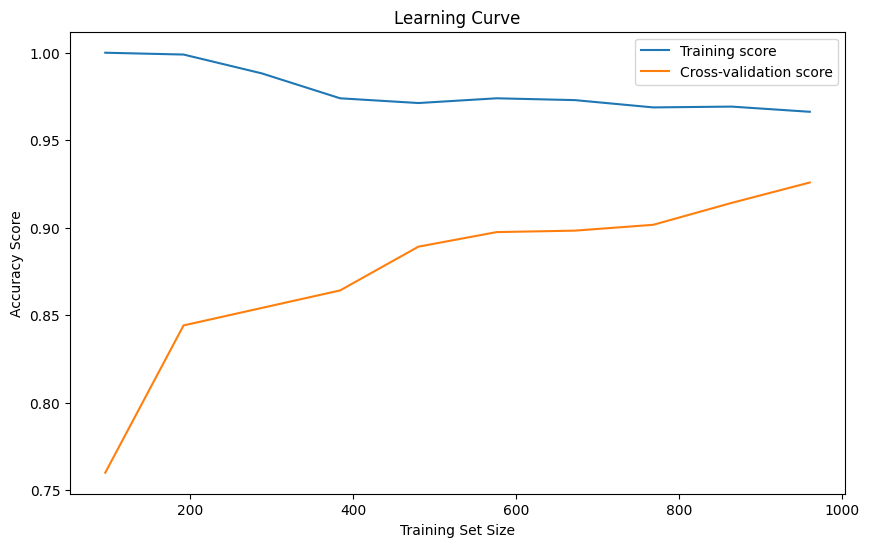

In [23]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    xgb_classifier, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy'
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

> **Random Forest**

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       215
           1       0.92      0.84      0.88        85

    accuracy                           0.93       300
   macro avg       0.93      0.90      0.92       300
weighted avg       0.93      0.93      0.93       300

AUC-ROC Score: 0.9037
Confusion Matrix:
[[209   6]
 [ 14  71]]


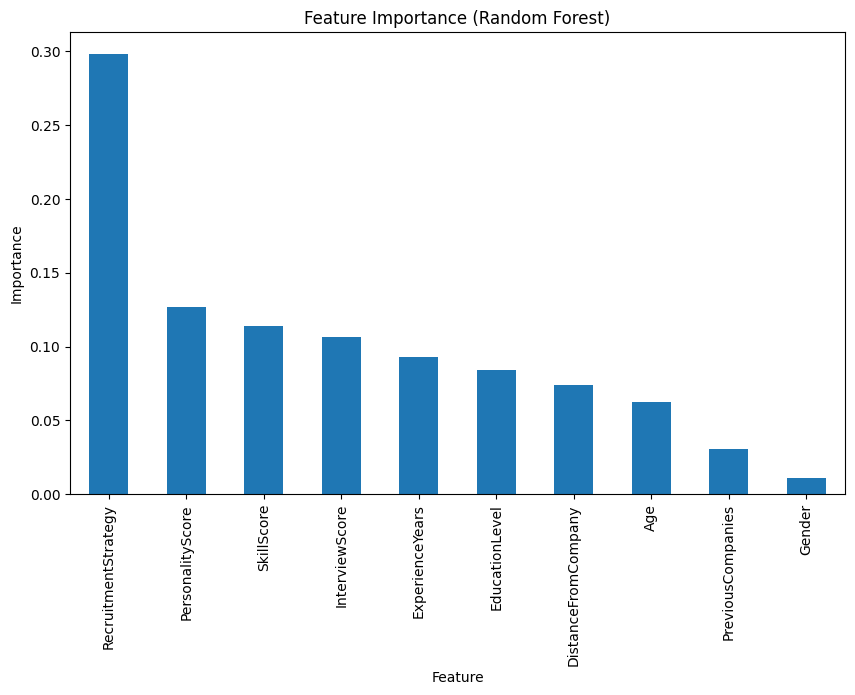

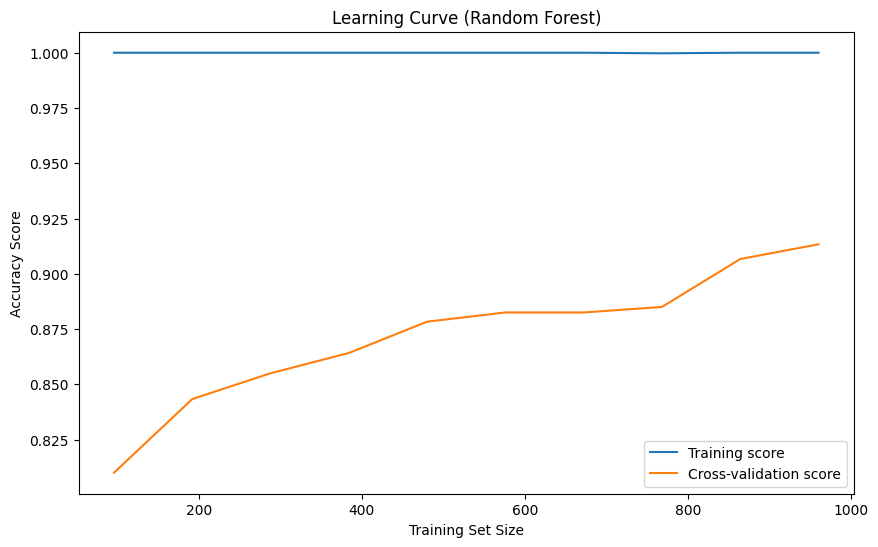

In [24]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,           # Number of trees in the forest
    max_depth=None,             # Maximum depth of each tree (None means unlimited)
    max_features='sqrt',        # Consider square root of features for splitting
    class_weight='balanced'     # Weight classes inversely proportional to class frequencies
)

# Model Training
rf_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"AUC-ROC Score: {roc_auc_rf:.4f}")

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

# Feature Importance
feature_importance_rf = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importance_rf.sort_values(ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance_rf.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

# Learning Curve
train_sizes_rf, train_scores_rf, valid_scores_rf = learning_curve(
    rf_classifier, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy'
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rf, np.mean(train_scores_rf, axis=1), label='Training score')
plt.plot(train_sizes_rf, np.mean(valid_scores_rf, axis=1), label='Cross-validation score')
plt.title('Learning Curve (Random Forest)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

> **Catboost Classifier**

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       215
           1       0.93      0.88      0.90        85

    accuracy                           0.95       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.95      0.95      0.95       300

AUC-ROC Score: 0.9272
Confusion Matrix:
[[209   6]
 [ 10  75]]


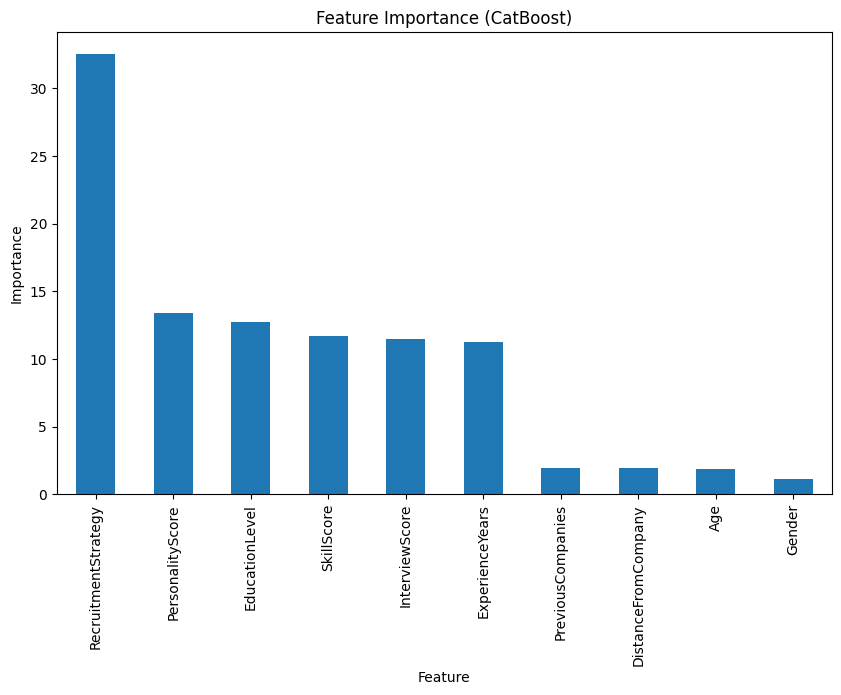

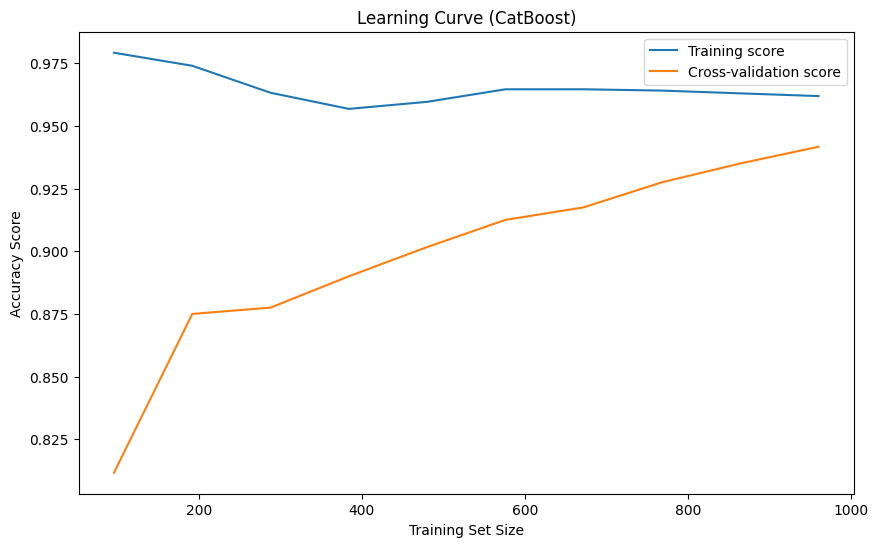

In [25]:
# CatBoost Classifier
catboost_classifier = CatBoostClassifier(
    iterations=100,             # Number of trees (boosting iterations)
    learning_rate=0.1,          # Learning rate
    depth=None,                 # Maximum depth of each tree (None means unlimited)
    l2_leaf_reg=3,              # L2 regularization term
    bootstrap_type='Bayesian',  # Bootstrap type (without subsampling)
    verbose=0              
)

# Model Training
catboost_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred_catboost = catboost_classifier.predict(X_test_scaled)

# Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_catboost))

roc_auc_catboost = roc_auc_score(y_test, y_pred_catboost)
print(f"AUC-ROC Score: {roc_auc_catboost:.4f}")

conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)
print("Confusion Matrix:")
print(conf_matrix_catboost)

# Feature Importance
feature_importance_catboost = pd.Series(catboost_classifier.feature_importances_, index=X.columns)
feature_importance_catboost.sort_values(ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance_catboost.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (CatBoost)')
plt.show()

# Learning Curve
train_sizes_catboost, train_scores_catboost, valid_scores_catboost = learning_curve(
    catboost_classifier, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy'
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_catboost, np.mean(train_scores_catboost, axis=1), label='Training score')
plt.plot(train_sizes_catboost, np.mean(valid_scores_catboost, axis=1), label='Cross-validation score')
plt.title('Learning Curve (CatBoost)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

# **Voting, Stacking & Weighted Average Ensemble**

In [26]:
# List of base classifiers
base_classifiers = [
    ('xgb', xgb_classifier),
    ('rf', rf_classifier),
    ('catboost', catboost_classifier)
]

def evaluate_classifier(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Handle different formats of predict_proba output
    if hasattr(classifier, "predict_proba"):
        y_pred_proba = classifier.predict_proba(X_test)
        # Check if y_pred_proba is 1D or 2D
        if y_pred_proba.ndim == 1:
            y_pred_proba_positive = y_pred_proba
        else:
            y_pred_proba_positive = y_pred_proba[:, 1]
    else:
        # If predict_proba is not available, use decision_function if it exists
        if hasattr(classifier, "decision_function"):
            y_pred_proba_positive = classifier.decision_function(X_test)
        else:
            # If neither is available, we can't calculate ROC AUC
            y_pred_proba_positive = None
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    
    if y_pred_proba_positive is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba_positive)
        print(f"ROC AUC: {roc_auc:.4f}")
    else:
        print("ROC AUC: Not available")
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

# Voting Classifier
voting_soft = VotingClassifier(estimators=base_classifiers, voting='soft')
print("Voting Classifier (Soft Voting)")
evaluate_classifier(voting_soft, X_train, X_test, y_train, y_test)

# Stacking Classifier
stacking = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=LogisticRegression(),
    cv=5
)
print("Stacking Classifier")
evaluate_classifier(stacking, X_train, X_test, y_train, y_test)

# Bagging with XGBoost
bagging_xgb = BaggingClassifier(
    base_estimator=XGBClassifier(objective='binary:logistic'),
    n_estimators=10,
    max_samples=0.8,
    max_features=0.8
)
print("Bagging with XGBoost")
evaluate_classifier(bagging_xgb, X_train, X_test, y_train, y_test)

# Weighted Average Ensemble
class WeightedEnsemble:
    def __init__(self, models, weights):
        self.models = models
        self.weights = weights

    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)

    def predict_proba(self, X):
        predictions = []
        for model in self.models:
            if hasattr(model, "predict_proba"):
                pred = model.predict_proba(X)
                # Check if pred is 1D or 2D
                if pred.ndim == 1:
                    predictions.append(pred)
                else:
                    predictions.append(pred[:, 1])
            elif hasattr(model, "decision_function"):
                predictions.append(model.decision_function(X))
            else:
                raise ValueError(f"Model {model} has no predict_proba or decision_function method")
        return np.average(predictions, axis=0, weights=self.weights)

    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba > 0.5).astype(int)

# You can adjust these weights based on your preference or model performance
weights = [0.4, 0.3, 0.3]  # for XGBoost, Random Forest, and CatBoost respectively
weighted_ensemble = WeightedEnsemble([xgb_classifier, rf_classifier, catboost_classifier], weights)

print("Weighted Average Ensemble")
evaluate_classifier(weighted_ensemble, X_train, X_test, y_train, y_test)

Voting Classifier (Soft Voting)
Accuracy: 0.9500
ROC AUC: 0.9318
Confusion Matrix:
[[209   6]
 [  9  76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       215
           1       0.93      0.89      0.91        85

    accuracy                           0.95       300
   macro avg       0.94      0.93      0.94       300
weighted avg       0.95      0.95      0.95       300



Stacking Classifier
Accuracy: 0.9533
ROC AUC: 0.9318
Confusion Matrix:
[[209   6]
 [  8  77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       215
           1       0.93      0.91      0.92        85

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300



Bagging with XGBoost
Accuracy: 0.9100
ROC AUC: 0.9134
Confusion Matrix:
[[204  11]
 [ 16  69]]
C

# **Kindly Upvote**

If you find this notebook usefull.